# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [45]:
# Começando a fazer o tratamento dos dados 
df = pd.read_csv('ecommerce_preparados.csv')

print("\n Lendo as primeiras linas \n",df.head().to_string())
print("\n Lendo as ultimas linhas \n ",df.tail().to_string())
print("\n Informações sobre o DataFrame \n ")
df.info()
print("Linhas e colunas ",df.shape)


 Lendo as primeiras linas 
    Unnamed: 0                                                        Título  Nota  N_Avaliações  Desconto                            Marca   Material      Gênero        Temporada                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Review1                                                                                                                                                                                                                                                                                                           

In [46]:
# Checando a quantidade de Valores Nulos 
print("\n Valroes nulos: \n", df.isnull().sum())


 Valroes nulos: 
 Unnamed: 0                0
Título                    0
Nota                    640
N_Avaliações            640
Desconto               1325
Marca                     0
Material                867
Gênero                   79
Temporada                 0
Review1                 684
Review2                 845
Review3                 966
Qtd_Vendidos              0
Preço                   235
Nota_MinMax             640
N_Avaliações_MinMax     640
Desconto_MinMax        1325
Preço_MinMax            235
Marca_Cod                 0
Material_Cod              0
Temporada_Cod             0
Qtd_Vendidos_Cod        226
Marca_Freq                0
Material_Freq           867
dtype: int64


In [47]:
# trasnformando valores nulos em 0
df_fillna = df.fillna(0, axis=1, inplace = True)
print(df.head().to_string())

  Unnamed: 0                                                        Título Nota N_Avaliações Desconto                            Marca   Material      Gênero        Temporada                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Review1                                                                                                                                                                                                                                                                                                                                            

In [48]:
# Excluindo as colunas que não ireie utilizar 
df.drop(labels=['Review1', 'Review2', 'Review3'], axis=1,  inplace = True) 
df.drop(labels=[ 'Nota_MinMax', 'N_Avaliações_MinMax', 'N_Avaliações_MinMax'],axis=1,  inplace = True) 
df.drop(labels=['Desconto_MinMax', 'Preço_MinMax', 'Marca_Cod', 'Material_Cod'], axis=1, inplace = True)   
df.drop(labels=['Temporada_Cod', 'Qtd_Vendidos_Cod','Marca_Freq', 'Material_Freq'], axis=1,  inplace = True)
                                    
print(df.head()) 

  Unnamed: 0                                             Título Nota  \
0          0  Pijama Cirurgico  Scrub Roupa Privativa Hospit...  4.0   
1          1  Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...  4.5   
2          2  Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...  4.7   
3          3  Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...  4.6   
4          4  Kit 3 Short Jeans Feminino Cintura Alta Barato...  4.4   

  N_Avaliações Desconto                            Marca   Material  \
0        273.0        0  toronto uniformes profissionais  poliéster   
1       3034.0     18.0                             lupo    algodão   
2       5682.0     20.0                            zorba    algodão   
3       1700.0     22.0                             mash    algodão   
4        507.0      9.0                     menina linda       jean   

       Gênero        Temporada Qtd_Vendidos   Preço  
0  Sem gênero     não definido        +1000    69.9  
1   Masculino   outono/inverno  

In [49]:
print(df.shape)
print(df.head().to_string())





(2199, 11)
  Unnamed: 0                                                        Título Nota N_Avaliações Desconto                            Marca   Material      Gênero        Temporada Qtd_Vendidos   Preço
0          0  Pijama Cirurgico  Scrub Roupa Privativa Hospitalar - Unissex  4.0        273.0        0  toronto uniformes profissionais  poliéster  Sem gênero     não definido        +1000    69.9
1          1  Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Masculina Atacado  4.5       3034.0     18.0                             lupo    algodão   Masculino   outono/inverno       +10mil  232.89
2          2         Kit Com 10 Cuecas Boxer Algodão Sem Costura Zorba 781  4.7       5682.0     20.0                            zorba    algodão   Masculino     não definido       +50mil   199.9
3          3   Kit 10 Cuecas Boxer Mash Algodão Cotton Box Original Oferta  4.6       1700.0     22.0                             mash    algodão   Masculino  primavera/verão       +10mil  229.39
4        

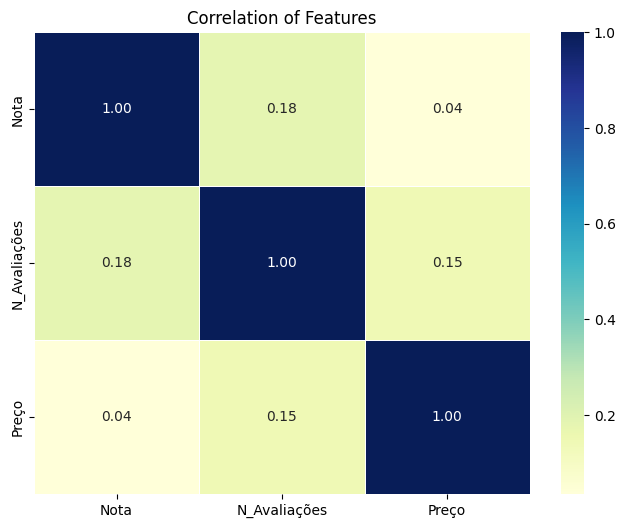

In [82]:

corr = df[['Nota', 'N_Avaliações','Preço']].corr()
plt.figure(figsize =(8, 6) )
sns.heatmap(corr, annot = True, cmap='YlGnBu',fmt='.2f',linewidths=0.5)
plt.title('Correlation of Features')
plt.show()

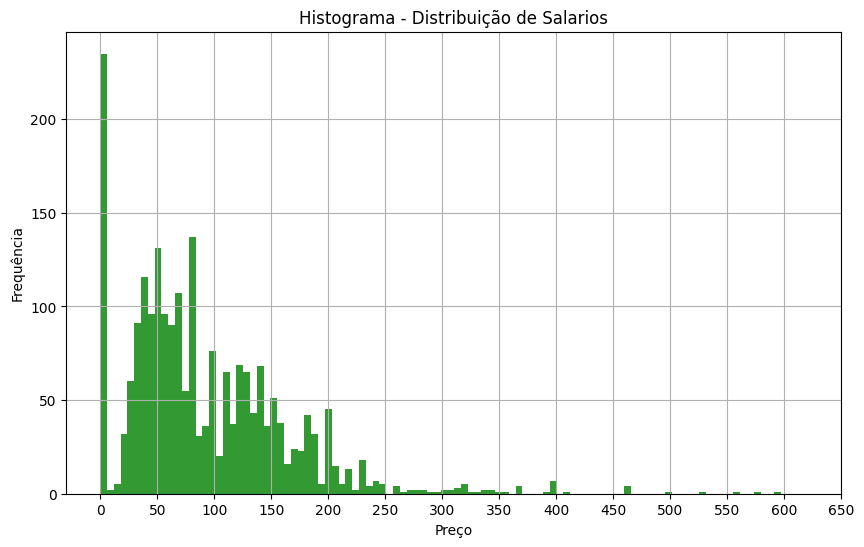

In [81]:
plt.figure(figsize=(10,6))
plt.hist(df['Preço'], bins=100, color='green', alpha=0.8)
plt.title('Histograma - Distribuição de Salarios')
plt.xlabel('Preço')
plt.xticks(ticks = range(0,int(df['Preço'].max())+100,50))
plt.ylabel('Frequência')
plt.grid(True)
plt.show() 


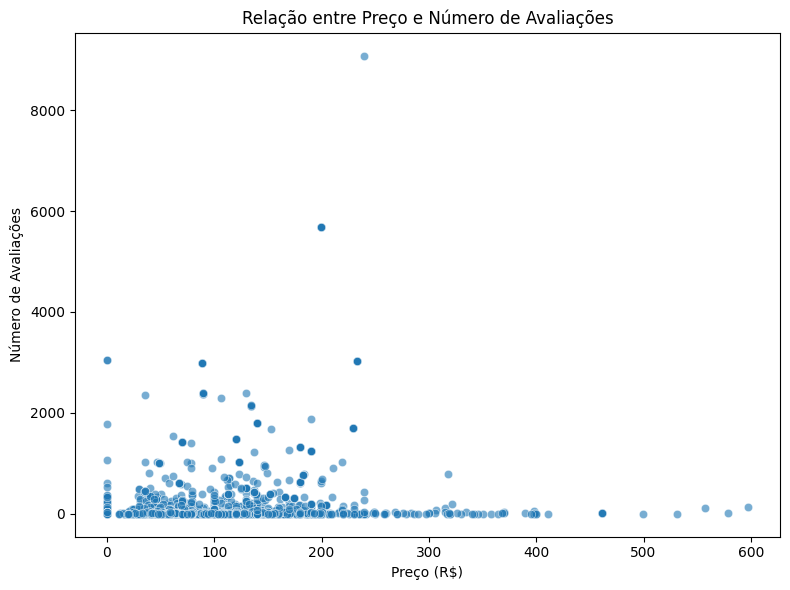

In [78]:
num_cols = ['Nota', 'N_Avaliações', 'Desconto', 'Preço', 'Qtd_Vendidos']
df_num = df[num_cols].dropna()


plt.figure(figsize=(8,6))
sns.scatterplot(data=df_num, x='Preço', y='N_Avaliações', alpha=0.6)
plt.title("Relação entre Preço e Número de Avaliações")
plt.xlabel("Preço (R$)")
plt.ylabel("Número de Avaliações")
plt.tight_layout()
plt.show()

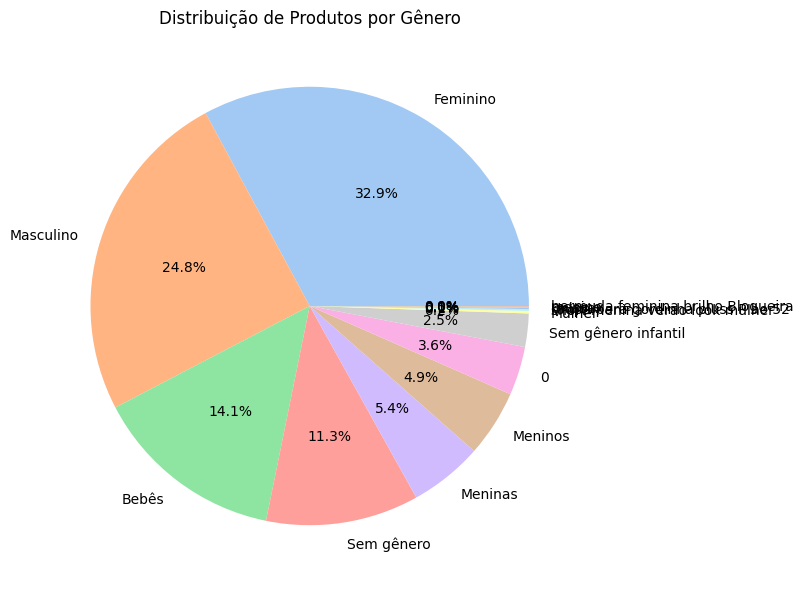

In [79]:
genero_counts = df['Gênero'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(genero_counts.values, labels=genero_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Distribuição de Produtos por Gênero")
plt.tight_layout()
plt.show()


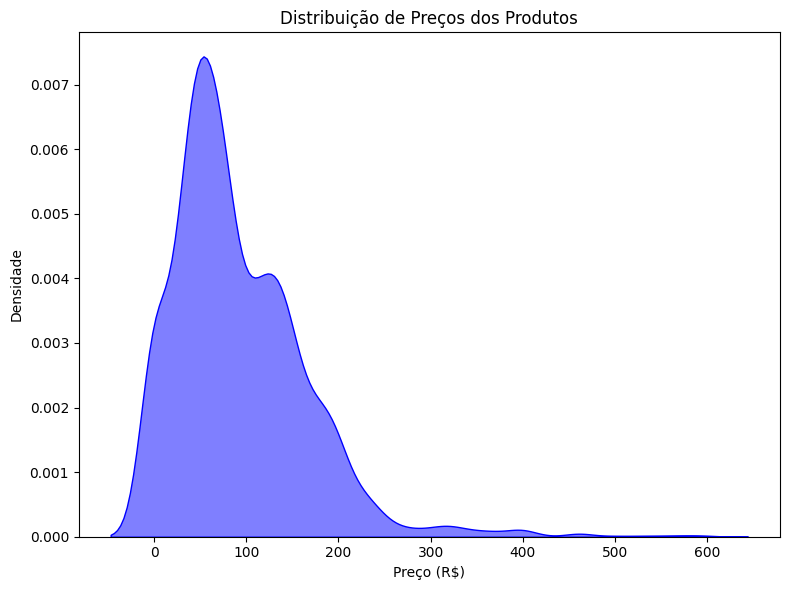

In [80]:
preco_series = pd.to_numeric(df['Preço'], errors='coerce')
preco_series = preco_series[np.isfinite(preco_series)]

plt.figure(figsize=(8,6))
sns.kdeplot(x=preco_series, fill=True, color='blue', alpha=0.5)
plt.title("Distribuição de Preços dos Produtos")
plt.xlabel("Preço (R$)")
plt.ylabel("Densidade")
plt.tight_layout()
plt.show()
